# lets import some libs to work with
### heres some information for each of them 
#### i use pandas to analzsis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Athletes_summer_games.csv')

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [4]:
df.sort_values(['Age', 'Medal'])
df['Medal'].isna()

0          True
1          True
2          True
3         False
4          True
          ...  
237668     True
237669    False
237670     True
237671     True
237672     True
Name: Medal, Length: 237673, dtype: bool

In [5]:
mask = df['Medal'].isna()
Medals = df[~mask]
Medals.head()

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,37,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,38,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,41,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,42,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [6]:
Medals.describe()

,Unnamed: 0,Age,Year
count,36537.000000,35816.000000,36537.000000
mean,128976.217177,25.984057,1975.104141
std,82149.030626,6.030839,35.652630
min,3.000000,10.000000,1896.000000
25%,56082.000000,22.000000,1952.000000
50%,127615.000000,25.000000,1984.000000
75%,201143.000000,29.000000,2004.000000
max,271103.000000,73.000000,2020.000000


In [7]:
mask = Medals['Age'] == 10
age = Medals[mask]
age.head()

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
117228,142882,Dimitrios Loundras,M,10.0,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [8]:
Medals.loc[Medals['Age'] == 73, ['Age', 'Medal']]

,Age,Medal
37344,73.0,Silver


In [9]:
gold_medals = Medals[Medals['Medal'] == 'Gold']
gold_medals.loc[gold_medals['Age'] == gold_medals['Age'].max(), :]

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
86948,105199,Charles Jacobus,M,64.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold
191460,233390,Oscar Gomer Swahn,M,64.0,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold


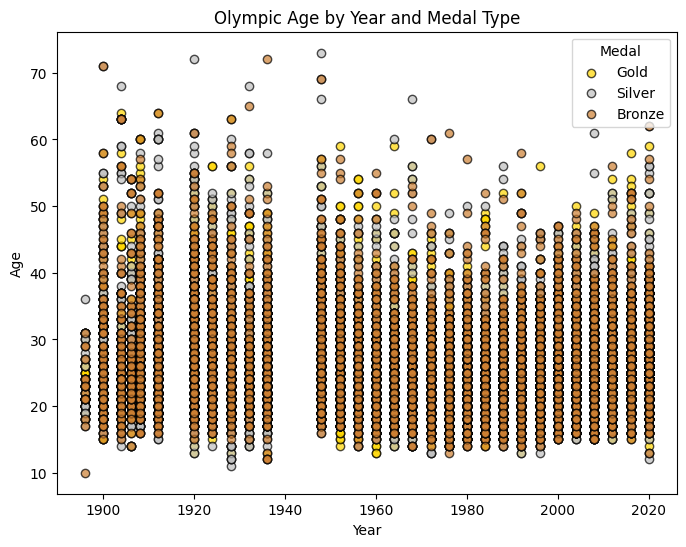

In [19]:
color_map = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}

plt.figure(figsize=(8, 6))
for medal in ['Gold', 'Silver', 'Bronze']:
    subset = Medals[Medals['Medal'] == medal]
    plt.scatter(subset['Year'], subset['Age'], 
                color=color_map[medal], label=medal, alpha=0.7, edgecolor='k')

plt.xlabel('Year')
plt.ylabel('Age')
plt.legend(title='Medal')
plt.title('Olympic Age by Year and Medal Type')
plt.show()